<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Software Development'),
  Text(1, 0, 'Other:'),
  Text(2, 0, 'Fintech'),
  Text(3, 0, 'Internet, Telecomm or Information Services'),
  Text(4, 0, 'Banking/Financial Services'),
  Text(5, 0, 'Healthcare'),
  Text(6, 0, 'Manufacturing'),
  Text(7, 0, 'Retail and Consumer Services'),
  Text(8, 0, 'Government'),
  Text(9, 0, 'Media & Advertising Services'),
  Text(10, 0, 'Higher Education'),
  Text(11, 0, 'Transportation, or Supply Chain'),
  Text(12, 0, 'Computer Systems Design and Services'),
  Text(13, 0, 'Energy'),
  Text(14, 0, 'Insurance')])

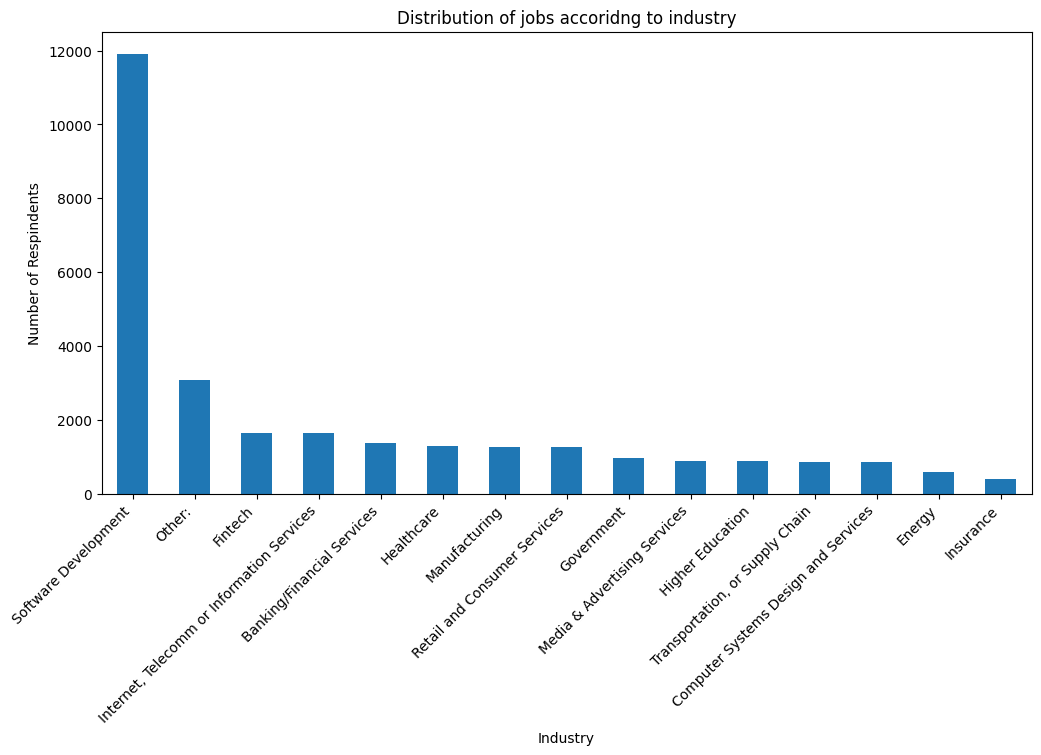

In [3]:
##Write your code here
plt.figure(figsize=(12, 6))
df['Industry'].value_counts().plot(kind='bar')
plt.title('Distribution of jobs accoridng to industry')
plt.ylabel('Number of Respindents')
plt.xticks(rotation=45, ha='right')

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [4]:
##Write your code here
comp = df['ConvertedCompYearly']
mean = comp.mean()
mediann = comp.median()
stdd = comp.std()
compthreshold = mean + 3*stdd
print(f"the mean is {mean}")
print(f"the median is {mediann}")
print(f"the standard deviation is {stdd}")
print(f"the comp threshold is {compthreshold}")

high_comp_outlier = df[comp> compthreshold]
print('\nNumber of High Compnesation outliers :', len(high_comp_outlier))

the mean is 86155.28726264134
the median is 65000.0
the standard deviation is 186756.97308629757
the comp threshold is 646426.2065215341

Number of High Compnesation outliers : 89


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64

 Q1 =32712.0, Q3=107971.5, IQR =75259.5
the lower bounds = -80177.25, upper bounds = 220860.75


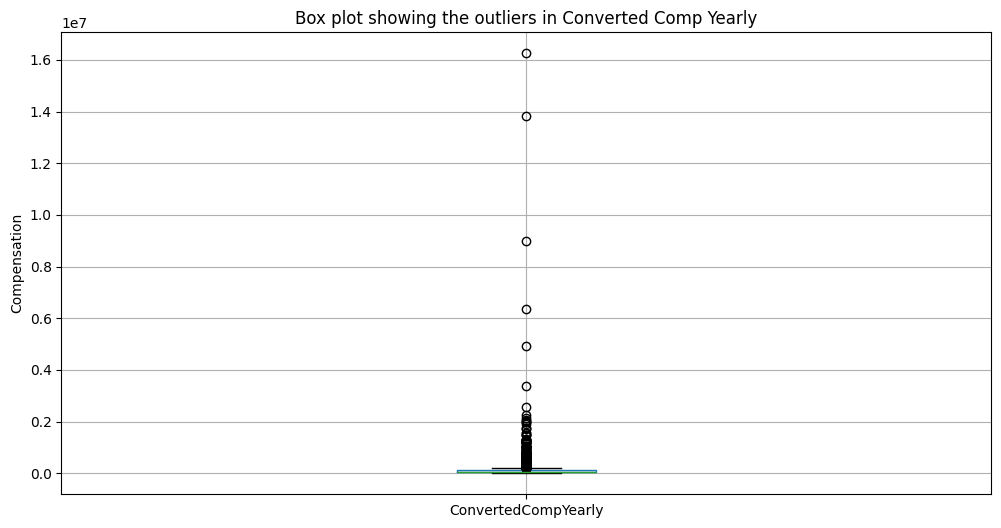

In [5]:
##Write your code here
print(comp.describe())

#actual calcualtion
Q1 = comp.quantile(0.25)
Q3 = comp.quantile(0.75)
IQR = Q3-Q1
print(f"\n Q1 ={Q1}, Q3={Q3}, IQR ={IQR}")

#the bounds 
upperbounds = Q3 + 1.5*IQR
lowerbounds = Q1 - 1.5*IQR
print(f"the lower bounds = {lowerbounds}, upper bounds = {upperbounds}")

plt.figure(figsize=(12, 6))
df.boxplot(column=['ConvertedCompYearly'])
plt.title('Box plot showing the outliers in Converted Comp Yearly')
plt.ylabel('Compensation')
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [7]:
##Write your code here

no_outlierDf = df[(df['ConvertedCompYearly'] >= lowerbounds) & (df['ConvertedCompYearly']<=upperbounds)]

print(f"the length of the orignial df {len(df)}")
print(f"the length of the new df without outliers is {len(no_outlierDf)}")

the length of the orignial df 65437
the length of the new df without outliers is 22457


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


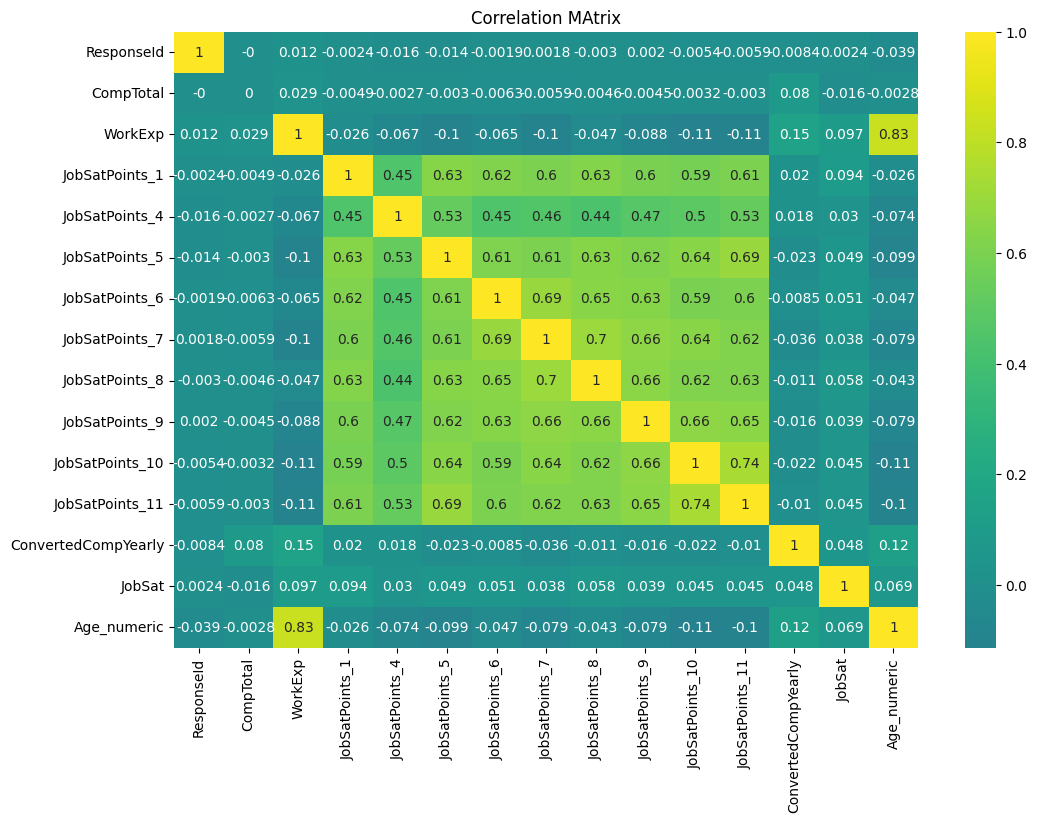

In [19]:
##Write your code here
#map age numerically
df = df.drop('Age_Numerics', axis=1)
age_map ={
    'Prefer not to say': 0,
    'Under 18 years old': 9,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old':49,
    '55-64 years old':59,
    '65 years or older':70
}
df['Age_numeric'] = df['Age'].map(age_map)
df['Age_numeric'].value_counts()

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot = True, cmap='viridis', center = 0)
plt.title('Correlation MAtrix')
plt.show()

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
